In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('Data/Medical.csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [25]:
def kde_graph(col):
    # Specify the feature
    feature = df[col]
    
    # find the mean and median
    mean = feature.mean()
    median = feature.median()
    
    # find the standard deviation and the x-range for -,+ 1.
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    
    #making the figure
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(feature ,ax=ax,stat='probability', kde=True)
    
    # Defining the addional lines 
    ax.axvline(mean, color = 'red', label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='--', color = 'green', label = f'Median = {median:,.2f}')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    
    # Adding the yellow background zone
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    
    # Add title and legend
    ax.set_title(f'{col}')
    ax.legend();

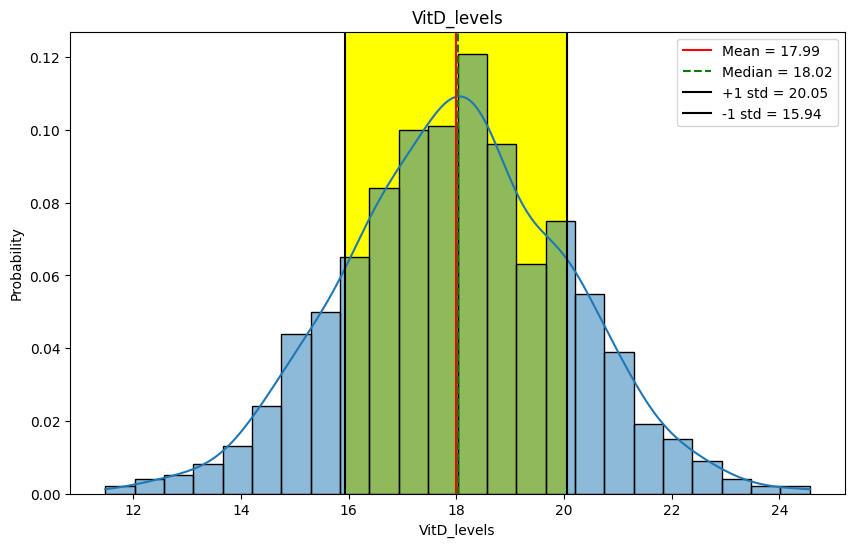

In [26]:
kde_graph('VitD_levels')

In [27]:
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

Answer the following questions:
    
    Is it Discrete or Continuous? # Continuous
    
    Does it have a skew? If so, which direction (+/-) # The graph is not skewed

    What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)    # Leptokurtic

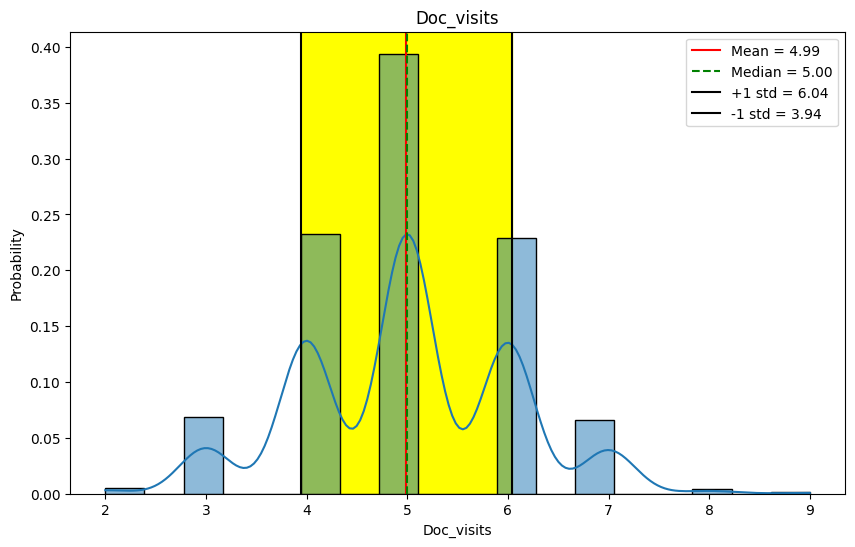

In [28]:
kde_graph('Doc_visits')

In [29]:
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.9919958083381206

Answer the following questions:

    Is it Discrete or Continuous? # Discrete
    
    Does it have a skew? If so, which direction (+/-) # This graph is Posotively skewed
    
    What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)      # Mesokurtic

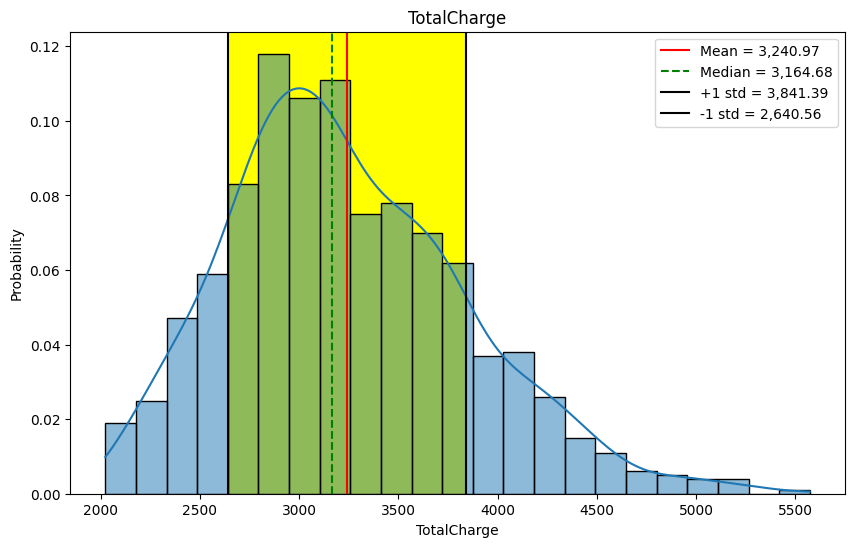

In [30]:
kde_graph('TotalCharge')

In [31]:
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384

Answer the following questions:

    Is it Discrete or Continuous? # Continuous
    
    Does it have a skew? If so, which direction (+/-) # This graph is positively skewed
    
    What type of kurtosis does it display? (Mesokurtic, Leptokurtic, Platykurtic)  # Leptokurtic